## Compute elastic impedance and normalized elastic impedance

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import impedance as ip
%matplotlib inline

### Elastic properties for AVO classes
The cell below defines the elastic properties for AVO classes compiled by [Alessandro del Monte](http://nbviewer.ipython.org/github/aadm/geophysical_notes/blob/master/avo_explorer_v2_mono.ipynb). Originally, Class IV is from Castagna & Swan (1997) "Principles of AVO crossplotting" (1997) and the others from Hilterman (2001) "Seismic Amplitude Interpretation".

In [4]:
shale = np.array([[3094,1515,2.40], [2643,1167,2.29], [2192,818,2.16], [3240,1620,2.34]])
sandgas = np.array([[4050,2526,2.21], [2781,1665,2.08], [1542,901,1.88], [1650,1090,2.07]])
avocl=['Class I','Class II','Class III','Class IV']

angle = 30

### 3 layers: shale / sand gas / shale

#### Now I'll compute and plot the reflectivity, wavelet, normal incidence offset gather and angle gather. 

In [34]:
# the properties now will generate a log
vp1 = np.zeros(100) + shale[1,0] #m/s
vs1 = np.zeros(100) + shale[1,1]
rho1 = np.zeros(100) + shale[1,2] #g/cc
vp2 = np.zeros(100) + sandgas[1,0]
vs2 = np.zeros(100) + sandgas[1,1] #m/s
rho2 = np.zeros(100) + sandgas[1,2] #g/cc

vp=np.concatenate((vp1,vp2,vp1))+np.random.normal(0, 8, vp.shape)
vs=np.concatenate((vs1,vs2,vs1))+np.random.normal(0, 1, vs.shape)
rho=np.concatenate((rho1,rho2,rho1))+np.random.normal(0, 0.005, rho.shape)

ai=ip.ai(vp,rho) # acoustic impedance
ei=ip.ei(vp,vs,rho,angle) # elastic impedance
nei=ip.nei(vp,vs,rho,shale[1,0],shale[1,1],shale[1,2],angle) # normalized elastic impedance

#### Plot the input, noisy and the predicted data using L1 and L2 regularization

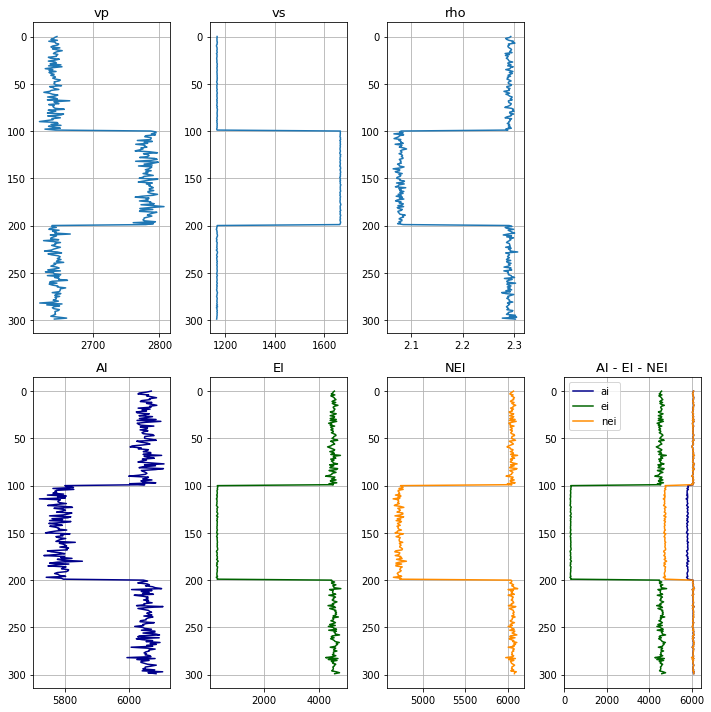

In [35]:
fig=plt.figure(figsize=(10,10))

ax=plt.subplot(2,4,1)
plt.title('vp',fontsize=13)
plt.plot(vp,np.arange(vp.shape[0]))
ax.invert_yaxis()
plt.grid(True)

ax=plt.subplot(2,4,2)
plt.title('vs',fontsize=13)
plt.plot(vs,np.arange(vs.shape[0]))
ax.invert_yaxis()
plt.grid(True)

ax=plt.subplot(2,4,3)
plt.title('rho',fontsize=13)
plt.plot(rho,np.arange(rho.shape[0]))
ax.invert_yaxis()
plt.grid(True)

ax=plt.subplot(2,4,5)
plt.title('AI',fontsize=13)
plt.plot(ai,np.arange(ai.shape[0]),color='darkblue')
ax.invert_yaxis()
plt.grid(True)

ax=plt.subplot(2,4,6)
plt.title('EI',fontsize=13)
plt.plot(ei,np.arange(ei.shape[0]),color='darkgreen')
ax.invert_yaxis()
plt.grid(True)

ax=plt.subplot(2,4,7)
plt.title('NEI',fontsize=13)
plt.plot(nei,np.arange(nei.shape[0]),color='darkorange')
ax.invert_yaxis()
plt.grid(True)

ax=plt.subplot(2,4,8)
plt.title('AI - EI - NEI',fontsize=13)
plt.plot(ai,np.arange(ai.shape[0]),label='ai',color='darkblue')
plt.plot(ei,np.arange(ei.shape[0]),label='ei',color='darkgreen')
plt.plot(nei,np.arange(nei.shape[0]),label='nei',color='darkorange')
plt.legend()
ax.invert_yaxis()
plt.grid(True)

plt.tight_layout()

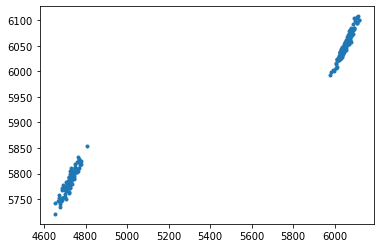

In [38]:
plt.figure()
plt.plot(nei,ai,'.')

### References:

Connolly, P., 1999, Elastic impedance: The Leading Edge, 18, 438–452.

Hilterman, F. J., 2001. Seismic amplitude interpretation: 2001 distinguished instructor short course (No. 4). SEG Books.

Whitcombe, D, 2002, Elastic impedance normalization, Geophysics, 67 (1), 60–62.
 
https://github.com/aadm/avo_explorer